# Effects of users' age, gender and type on the trip duration and invesitgating the relevance are these factors to being a memebr of the bike for all program

## Investigation Overview

I'm most interested in figuring out answers for **Quesions** like What are the possible factors that affects the trip duration?, is being a user relvant to the age and is customer or a subscriber relevant to the user's gender? are also urged for investigation.

Furthermore, the bike_share_for_all_trip coulmn that tracks members who are enrolled in the Bike Share for All program for low-income residents is ana important factor that need to be investigated as well.

## Dataset Overview

The data consisted of some demographic information for the users such as age and gender and other information such as the user type(Customer or subscriber) as well as if the memeber of the bike for all program or not.

In [62]:
import time
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import seaborn as sns
sns.set_style('darkgrid')

In [63]:
# Load the data 
# Data Wrangling have been already done to the file:
#checking the data for any missing values or duplicated rows as well as cleaning and clarifying it whenever needed,
#the detailed description of the steps is elaborated in part 1
df=pd.read_csv('Bike share data_wrangled.csv')

## Distribution of User's age

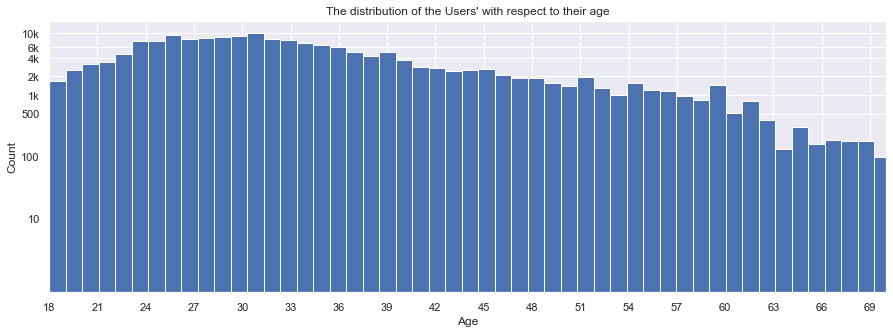

In [64]:
# investigating the distribution of users with repect to their age focused only on age range(18-70)
plt.figure(figsize=[15, 5])
plt.hist(data = df, x = 'USER_AGE', bins = 120)
plt.yscale('log')
plt.yticks([100,500,10, 1e3, 2e3, 4e3, 6e3, 1e4], [100,500, 10,'1k', '2k', '4k', '6k','10k'])
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('The distribution of the Users\' with respect to their age');
plt.xlim(18,70)
plt.xticks(np.arange(18,70,3))
plt.show()

> For this graph, it can be seen the **higher** number of users are most likely in their late **20s** and **30s**

## The number of customers and sucbscribers with respect to their age group
This plost has been recreated with a clear legend, better colors and higher resolution to be able to view the data better

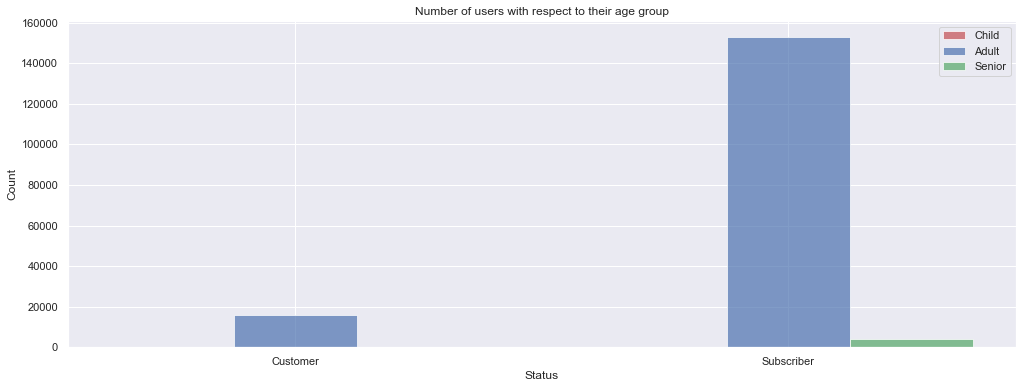

In [85]:
#Group one for users aged from 0 to 18 years old
child =df.query('USER_AGE<19')
child_g=child.groupby('USER_TYPE').count()
child_age=child_g['USER_AGE']
#Group two for users aged from 19 to 59 years old
adult=df.query('19<USER_AGE<60')
adult_g=adult.groupby('USER_TYPE').count()
adult_age=adult_g['USER_AGE']
#Group two for users who are above 60 years old
senior=df.query('USER_AGE>=60')
senior_g=senior.groupby('USER_TYPE').count()
senior_age=senior_g['USER_AGE']
#plot
width = 0.25
ind=np.arange(len(child_age))
child_bars = plt.bar(ind, child_age, width, color='r', alpha=.7, label='Child')
adult_bars = plt.bar(ind + width, adult_age, width, color='b', alpha=.7, label='Adult')
senior_Adult_bars = plt.bar(ind + (2*width), senior_age, width, color='g', alpha=.7, label='Senior')

# title and labels
plt.ylabel('Count')
plt.xlabel('Status')
plt.title('Number of users with respect to their age group')
locations = ind + width 
labels = ['Customer', 'Subscriber']
plt.xticks(locations, labels);
plt.legend(loc = 'best')


> The figure shows that **Adults** are the **dominant** bike users in subscriber and customer types. It can also be noted the number of **Child** users is **negligble** compared to adults and seniors, furthermore, **senior** users are more intersted in **subscription** as well as adults.

## Distribution of users with respest to their gender and trip duration
This plost has been recreated with a clear legend and higher resolution to be able to view the data better

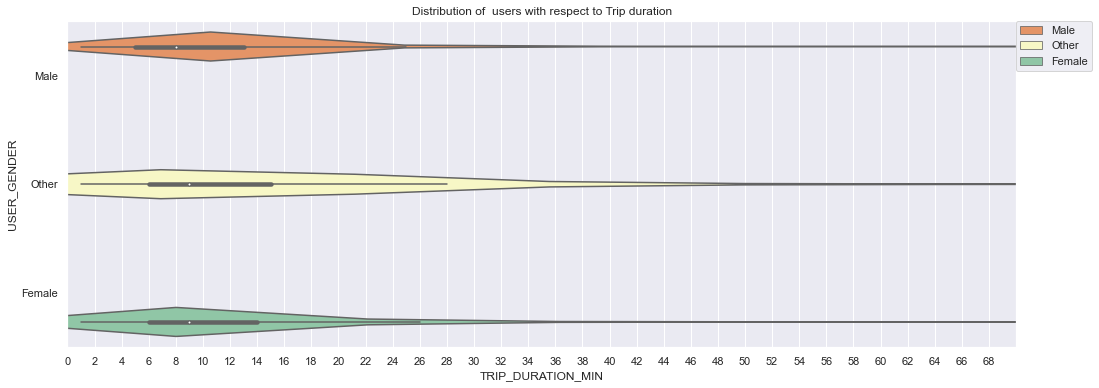

In [95]:
# This plot is aimed at showing the distribution of users with respest to their gender and trip duration
ax=sns.violinplot(x='TRIP_DURATION_MIN',y='USER_GENDER',data=df, hue='USER_GENDER',palette='Spectral');
sns.set(rc={'figure.figsize':(17,6)});
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
ax.set_xlim(0,70)
plt.xticks(np.arange(0,70,2))
plt.title('Distribution of users with respect to their gender Trip duration')
sns.set_style("darkgrid")
plt.figure(dpi=800);
plt.show()

> It can be seen that users of **other** genders are more **likely** to spend more time for a **single** trip followed by **female** users after which comes **male** users.

## Tracking members who are enrolled in the Bike Share for All program and investigate their age, gender, user type as well as their usage pattern facots such as the weekday of usage
This plost has been recreated with a clearer legend and higher resolution to be able to view the data better

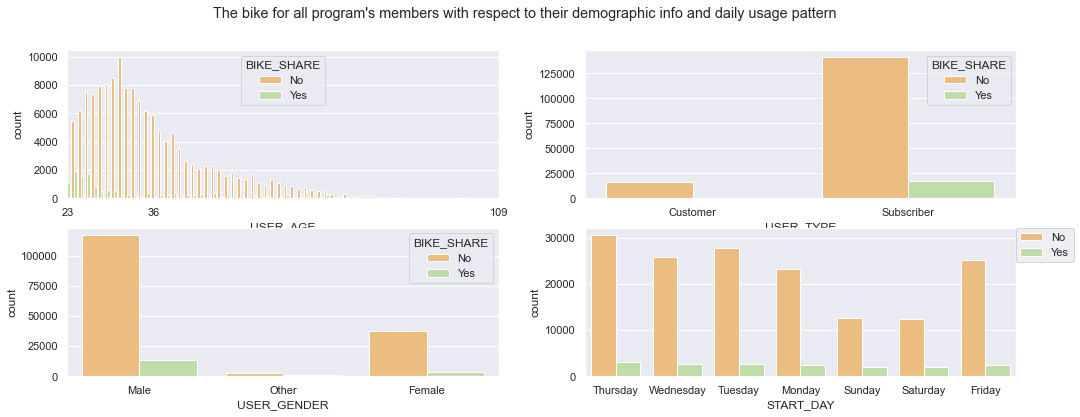

<Figure size 13600x4800 with 0 Axes>

In [102]:
fig, axes = plt.subplots(nrows=2, ncols=2);
hx=sns.countplot(ax=axes[0,0], x='USER_AGE',data=df, hue='BIKE_SHARE',palette='Spectral');
hx.set(xlim=(18,70),xticks=[18,70,5]);
sns.countplot(ax=axes[0,1],x='USER_TYPE',data=df, hue='BIKE_SHARE',palette='Spectral');
sns.countplot(ax=axes[1,0],x='USER_GENDER',data=df, hue='BIKE_SHARE',palette='Spectral');
sns.countplot(ax=axes[1,1],x='START_DAY',data=df, hue='BIKE_SHARE',palette='Spectral');
fig.suptitle(('The bike for all program\'s members with respect to their demographic info and daily usage pattern '));
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0);
plt.figure(dpi=800);
plt.tight_layout();
plt.show();

> Most of the **members** of the bike share program are in their **20s** and mostly they are **males** and **subscribers** . For the usage pattern, unlike the non members, they kept almost a **stable** usage pattern over the sevens day of the week

## Conclusions

+The **higheest** number of users are most likely in their late **20s** and **30s**

+Users of **other** genders are more **likely** to spend more time for a **single** trip followed by **female** users after which comes **male** users.

+For the **subscription status**, it has been found that the highest percentage of subscribers belong to the adult age group

+The bike share program members are mostly males who are in their **20s** and mostly they are **subscribers** with a almost a stable usage pattern over the weekdays.


